In [39]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
key="fd03a3919d41555c169795a0413a0aee6c2240a9"

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-4-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-11 00:00:00+00:00,187.88,189.78,187.61,188.50,18831470,44.884286,45.338194,44.819784,45.032404,75325880,0.0,1.0
1,AAPL,2018-07-12 00:00:00+00:00,191.03,191.41,189.31,189.53,18041131,45.636817,45.727599,45.225911,45.278469,72164524,0.0,1.0
2,AAPL,2018-07-13 00:00:00+00:00,191.33,191.84,190.90,191.08,12519792,45.708487,45.830325,45.605760,45.648762,50079168,0.0,1.0
3,AAPL,2018-07-16 00:00:00+00:00,190.91,192.65,190.42,191.52,15043110,45.608149,46.023833,45.491089,45.753878,60172440,0.0,1.0
4,AAPL,2018-07-17 00:00:00+00:00,191.45,191.87,189.20,189.75,15534523,45.737155,45.837492,45.199633,45.331027,62138092,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-06-30 00:00:00+00:00,193.97,194.48,191.26,191.630,85213216,193.97,194.48,191.26,191.630,85213216,0.0,1.0
1252,AAPL,2023-07-03 00:00:00+00:00,192.46,193.88,191.76,193.780,31458198,192.46,193.88,191.76,193.780,31458198,0.0,1.0
1253,AAPL,2023-07-05 00:00:00+00:00,191.33,192.98,190.62,191.565,46920261,191.33,192.98,190.62,191.565,46920261,0.0,1.0
1254,AAPL,2023-07-06 00:00:00+00:00,191.81,192.02,189.20,189.840,45156009,191.81,192.02,189.20,189.840,45156009,0.0,1.0
1255,AAPL,2023-07-07 00:00:00+00:00,190.68,192.67,190.24,191.410,46814998,190.68,192.67,190.24,191.410,46814998,0.0,1.0


In [10]:
df.info

<bound method DataFrame.info of      symbol                       date   close    high     low     open  \
0      AAPL  2018-07-11 00:00:00+00:00  187.88  189.78  187.61  188.500   
1      AAPL  2018-07-12 00:00:00+00:00  191.03  191.41  189.31  189.530   
2      AAPL  2018-07-13 00:00:00+00:00  191.33  191.84  190.90  191.080   
3      AAPL  2018-07-16 00:00:00+00:00  190.91  192.65  190.42  191.520   
4      AAPL  2018-07-17 00:00:00+00:00  191.45  191.87  189.20  189.750   
...     ...                        ...     ...     ...     ...      ...   
1251   AAPL  2023-06-30 00:00:00+00:00  193.97  194.48  191.26  191.630   
1252   AAPL  2023-07-03 00:00:00+00:00  192.46  193.88  191.76  193.780   
1253   AAPL  2023-07-05 00:00:00+00:00  191.33  192.98  190.62  191.565   
1254   AAPL  2023-07-06 00:00:00+00:00  191.81  192.02  189.20  189.840   
1255   AAPL  2023-07-07 00:00:00+00:00  190.68  192.67  190.24  191.410   

        volume    adjClose     adjHigh      adjLow     adjOpen  adj

In [21]:
df1=df.reset_index()['close']

In [22]:
print(df1)

0       187.88
1       191.03
2       191.33
3       190.91
4       191.45
         ...  
1251    193.97
1252    192.46
1253    191.33
1254    191.81
1255    190.68
Name: close, Length: 1256, dtype: float64


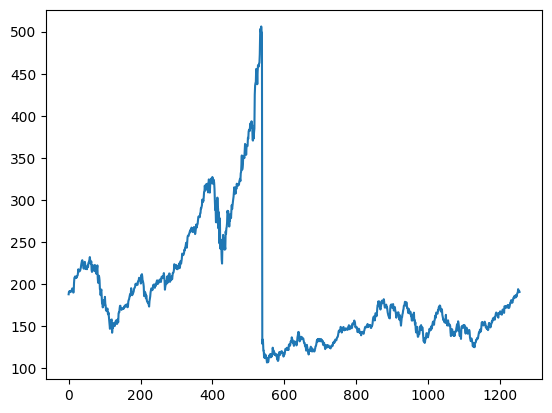

In [14]:
plt.plot(df1)

In [23]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[0.20298059]
 [0.21087038]
 [0.21162179]
 ...
 [0.21162179]
 [0.21282405]
 [0.20999374]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(816, 440)

In [27]:
train_data

array([[2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],


In [29]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 454ms/step - loss: 0.0367 - val_loss: 6.0731e-04
Epoch 2/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0137 - val_loss: 0.0029
Epoch 3/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0110 - val_loss: 4.1242e-04
Epoch 4/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0091 - val_loss: 6.7471e-04
Epoch 5/100
12/12 [==============================] - 4s 332ms/step - loss: 0.0086 - val_loss: 6.5110e-04
Epoch 6/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0075 - val_loss: 3.2132e-04
Epoch 7/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0067 - val_loss: 4.1844e-04
Epoch 8/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0068 - val_loss: 2.8572e-04
Epoch 9/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0060 - val_loss: 3.4262e-04
Epoch 10/100
12/12 [==============================] - 3s 2

In [40]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 43ms/step


In [41]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

224.38023127773542

In [43]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

156.0226637870918

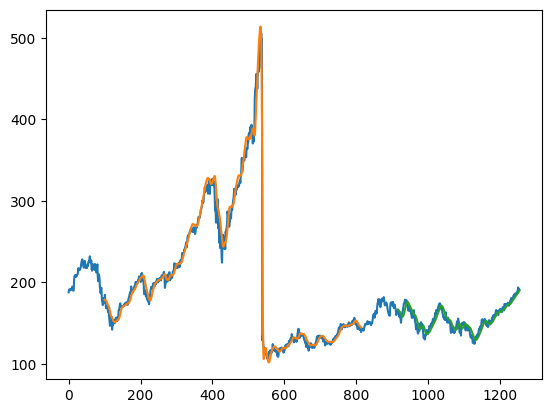

In [46]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

440

In [48]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



0 day input [0.12145272 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987
 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253
 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799
 0.11458986 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627
 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827
 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154
 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997

In [54]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
day_new.shape

(100,)

In [58]:
day_pred.shape

(30,)

In [55]:
len(df1)

1256

In [59]:
len(lst_output)

30

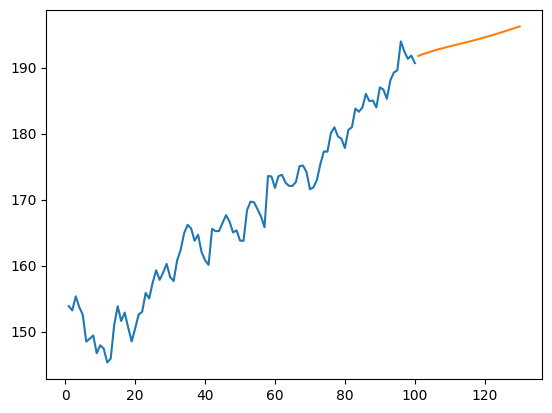

In [61]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

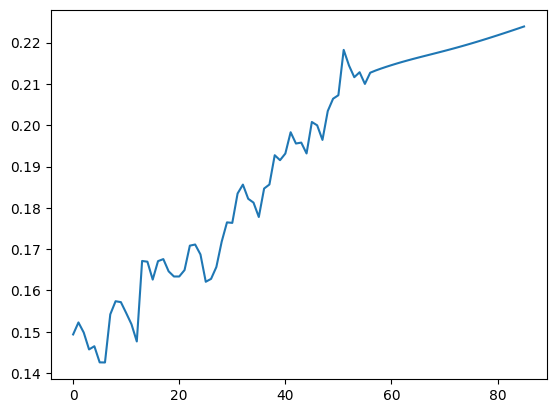

In [62]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [63]:
df3=scaler.inverse_transform(df3).tolist()

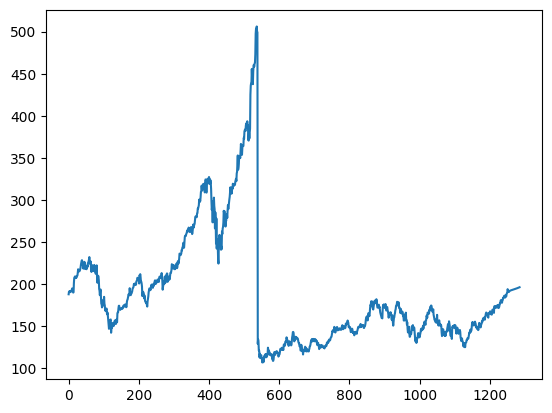

In [64]:
plt.plot(df3)